# Child Opportunity Index and Segregation
In this notebook we use the Child Opportunity Index from the 
* [DiversityDataKids project ](https://www.diversitydatakids.org/)

to show how to join tables and to aggregate values in a table
using a very interesting data set.

You can get a sense of what they are doing by looking at this webapp
which allows you to explore different US neighborhoods
to see the levels of opportunity for kids in the neighborhood.
* [Diversitydatakids app ](https://www.diversitydatakids.org/maps/#/explorer/25021400900/15/10,15//xc/m/1.0.14/42.317/-71.115/12.26/)

The data is in the DiversityDataKids folder inside the data folder

For this notebook we want to look at the relationship between the level of segregation in a neighborhood and the child opportunity index.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Reading in the data!
We use the read_csv function to create our data frames

In [2]:
coi_df = pd.read_csv('data/DiversityDataKids/childOpportunity/index.csv')
coi_df 

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,r_SE_stt,r_COI_stt,c5_ED_met,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met
0,1001020100,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,424,0.001198,...,67,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,83,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001020200,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,497,0.013306,...,31,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,26,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001020300,2010,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,878,-0.014533,...,77,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144403,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,33,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144404,56045951100,2010,NaN,NaN,NaN,56045,56,WY,638,-0.028395,...,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144405,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144406,56045951300,2010,NaN,NaN,NaN,56045,56,WY,954,-0.004055,...,22,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
coi_df = coi_df[ coi_df['year']==2015]
coi_df

,geoid,year,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,r_SE_stt,r_COI_stt,c5_ED_met,c5_HE_met,c5_SE_met,c5_COI_met,r_ED_met,r_HE_met,r_SE_met,r_COI_met
1,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,83,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,26,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,60,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,79,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,88,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144399,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,40,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144401,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,33,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144403,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,33,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144405,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
div_df = pd.read_csv('data/DiversityDataKids/demographics/01001_3_P_140_5.csv')

In [5]:
div_df

,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,14000US01001020100,"Census Tract 201, Autauga County, Alabama",2008-2012,0.0,1.720479,0.000000,1.720479,0.000000,1.720479,13.207547,...,13.207547,20.672415,0.000000,1.720479,0.000000,1.720479,0.000000,1.720479,86.792450,5.257348
1,14000US01001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.0,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
2,14000US01001020200,"Census Tract 202, Autauga County, Alabama",2008-2012,0.0,1.467773,6.639839,3.551034,6.639839,3.551034,46.076458,...,57.545273,14.879006,0.000000,1.467773,4.828974,4.033463,4.828974,4.033463,42.454727,4.707581
3,14000US01001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.0,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
4,14000US01001020300,"Census Tract 203, Autauga County, Alabama",2008-2012,0.0,0.830847,1.708428,1.970122,1.708428,1.970122,22.095671,...,26.765377,16.926208,0.000000,0.830847,0.000000,0.830847,0.000000,0.830847,76.195900,5.816336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146107,14000US56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.0,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146108,14000US56045951100,"Census Tract 9511, Weston County, Wyoming",2008-2012,0.0,1.143391,0.000000,1.143391,0.000000,1.143391,0.000000,...,1.724138,15.024548,0.313480,1.178107,0.313480,1.178107,0.000000,1.143391,99.686523,0.681932
146109,14000US56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.0,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153
146110,14000US56045951300,"Census Tract 9513, Weston County, Wyoming",2008-2012,0.0,0.764657,2.410902,1.740727,2.410902,1.740727,0.000000,...,20.125786,11.637415,5.870021,1.178979,17.714886,3.602431,11.844864,3.635330,79.874214,3.945384


# Data Cleaning
We would like to combine these two tables using the geocode for the 2015 year data.
So we need to remove the 2010 data in the first table (and the 2008-2012 data in the second).

Also, you can see that the geocode for the COI and the DIV frames are slightly different. The DIV have 8 additional characters at the beginning " 14000US". The geocode uniquely identifies the neighborhood, so we can use it to combine the two tables where each row would correspond to one neighborhood but we first have to get the geocodes in the same form.


In [6]:
int(div_df['geoid'][146111][7:])

56045951300

In [7]:
int('12345678901234567890')

12345678901234567890

In [8]:
z = div_df['geoid'].apply(lambda x: int(x[7:]))
z

0          1001020100
1          1001020100
2          1001020200
3          1001020200
4          1001020300
             ...     
146107    56043000302
146108    56045951100
146109    56045951100
146110    56045951300
146111    56045951300
Name: geoid, Length: 146112, dtype: int64

In [9]:
div_df['geoid'] = z
div_df


,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,"Census Tract 201, Autauga County, Alabama",2008-2012,0.0,1.720479,0.000000,1.720479,0.000000,1.720479,13.207547,...,13.207547,20.672415,0.000000,1.720479,0.000000,1.720479,0.000000,1.720479,86.792450,5.257348
1,1001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.0,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
2,1001020200,"Census Tract 202, Autauga County, Alabama",2008-2012,0.0,1.467773,6.639839,3.551034,6.639839,3.551034,46.076458,...,57.545273,14.879006,0.000000,1.467773,4.828974,4.033463,4.828974,4.033463,42.454727,4.707581
3,1001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.0,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
4,1001020300,"Census Tract 203, Autauga County, Alabama",2008-2012,0.0,0.830847,1.708428,1.970122,1.708428,1.970122,22.095671,...,26.765377,16.926208,0.000000,0.830847,0.000000,0.830847,0.000000,0.830847,76.195900,5.816336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146107,56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.0,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146108,56045951100,"Census Tract 9511, Weston County, Wyoming",2008-2012,0.0,1.143391,0.000000,1.143391,0.000000,1.143391,0.000000,...,1.724138,15.024548,0.313480,1.178107,0.313480,1.178107,0.000000,1.143391,99.686523,0.681932
146109,56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.0,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153
146110,56045951300,"Census Tract 9513, Weston County, Wyoming",2008-2012,0.0,0.764657,2.410902,1.740727,2.410902,1.740727,0.000000,...,20.125786,11.637415,5.870021,1.178979,17.714886,3.602431,11.844864,3.635330,79.874214,3.945384


In [10]:
div_df = div_df[ div_df['year']=='2013-2017']
div_df

,geoid,name,year,aian_est,aian_se,api_est,api_se,asian_est,asian_se,black_est,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
1,1001020100,"Census Tract 201, Autauga County, Alabama",2013-2017,0.000000,1.615201,3.381642,2.420207,3.381642,2.420207,4.589372,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
3,1001020200,"Census Tract 202, Autauga County, Alabama",2013-2017,0.000000,1.316325,1.968504,1.864003,1.968504,1.864003,45.078739,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
5,1001020300,"Census Tract 203, Autauga County, Alabama",2013-2017,0.000000,0.831708,0.995025,1.221990,0.995025,1.221990,18.407961,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
7,1001020400,"Census Tract 204, Autauga County, Alabama",2013-2017,0.826446,1.112295,0.000000,0.690799,0.000000,0.690799,4.235538,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
9,1001020500,"Census Tract 205, Autauga County, Alabama",2013-2017,0.000000,0.384749,2.768987,1.218844,2.768987,1.218844,20.727848,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146103,56043000200,"Census Tract 2, Washakie County, Wyoming",2013-2017,0.299850,1.141473,0.000000,1.093678,0.000000,1.093678,3.748126,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
146105,56043000301,"Census Tract 3.01, Washakie County, Wyoming",2013-2017,0.000000,1.110325,0.000000,1.110325,0.000000,1.110325,0.000000,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
146107,56043000302,"Census Tract 3.02, Washakie County, Wyoming",2013-2017,0.000000,1.033262,0.000000,1.033262,0.000000,1.033262,0.000000,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
146109,56045951100,"Census Tract 9511, Weston County, Wyoming",2013-2017,0.000000,1.264269,2.253033,2.435257,2.253033,2.435257,0.000000,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


# Merging the tables
We can now merge the two tables using the geoid field and get one big table for our analysis!

In [11]:
df = pd.merge(coi_df, div_df,on='geoid')
df

,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
72184,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
72185,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
72186,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


In [12]:
df.fillna(0.0)

,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,0.0,0.0,0.0,56043,56,WY,667,0.002666,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
72184,56043000301,2015,0.0,0.0,0.0,56043,56,WY,657,0.012065,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
72185,56043000302,2015,0.0,0.0,0.0,56043,56,WY,706,0.023999,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
72186,56045951100,2015,0.0,0.0,0.0,56045,56,WY,577,-0.009124,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


# check the columns!
We see the columns contain both the COI and DIV columns

In [13]:
for val in df.iloc[1454].fillna(0.0):
    print(val)


4013040506
2015
1.0
38060.0
Phoenix-Mesa-Scottsdale, AZ Metro Area
4013
4
AZ
0
-0.010097345
-0.011347721
0.2131564
0.022539491
Moderate
Low
Very High
High
49
23
88
72
Moderate
Low
Very High
High
60
40
91
78
Moderate
Moderate
Very High
High
56.0
45.0
88.0
75.0
Census Tract 405.06, Maricopa County, Arizona
2013-2017
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [14]:
df.columns

Index(['geoid', 'year_x', 'in100', 'msaid15', 'msaname15', 'countyfips',
       'statefips', 'stateusps', 'pop', 'z_ED_nat', 'z_HE_nat', 'z_SE_nat',
       'z_COI_nat', 'c5_ED_nat', 'c5_HE_nat', 'c5_SE_nat', 'c5_COI_nat',
       'r_ED_nat', 'r_HE_nat', 'r_SE_nat', 'r_COI_nat', 'c5_ED_stt',
       'c5_HE_stt', 'c5_SE_stt', 'c5_COI_stt', 'r_ED_stt', 'r_HE_stt',
       'r_SE_stt', 'r_COI_stt', 'c5_ED_met', 'c5_HE_met', 'c5_SE_met',
       'c5_COI_met', 'r_ED_met', 'r_HE_met', 'r_SE_met', 'r_COI_met', 'name',
       'year_y', 'aian_est', 'aian_se', 'api_est', 'api_se', 'asian_est',
       'asian_se', 'black_est', 'black_se', 'hisp_est', 'hisp_se', 'nhisp_est',
       'nhisp_se', 'nhopi_est', 'nhopi_se', 'nhwhite_est', 'nhwhite_se',
       'nnhwhite_est', 'nnhwhite_se', 'other_est', 'other_se', 'othermore_est',
       'othermore_se', 'twomore_est', 'twomore_se', 'white_est', 'white_se'],
      dtype='object')

In [15]:
df.fillna(0)
df[ (~np.isfinite(df['r_COI_stt'])) | (~ np.isfinite(df['white_est'])) ]['white_est']

1454    NaN
1455    NaN
1456    NaN
1466    NaN
1468    NaN
         ..
67759   NaN
68012   NaN
70837   NaN
70842   NaN
71330   NaN
Name: white_est, Length: 156, dtype: float64

In [16]:
for key in df.iloc[1454]:
    print(key)

4013040506
2015
1.0
38060.0
Phoenix-Mesa-Scottsdale, AZ Metro Area
4013
4
AZ
0
-0.010097345
-0.011347721
0.2131564
0.022539491
Moderate
Low
Very High
High
49
23
88
72
Moderate
Low
Very High
High
60
40
91
78
Moderate
Moderate
Very High
High
56.0
45.0
88.0
75.0
Census Tract 405.06, Maricopa County, Arizona
2013-2017
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [18]:
plt.figure(figsize=(50,50))

x = df['r_COI_nat']
y = df['white_est']
#plt.hist2d(x,y, bins=(10, 10), cmap=plt.cm.jet)
'done'
df2 = df[np.isfinite(df['r_COI_stt']) & np.isfinite(df['white_est'])]
df2


#plt.scatter(coidiv_df['r_COI_stt'],coidiv_df['black_est'])

,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_est,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,15.700483,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,50.590549,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,37.064678,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,23.966942,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,28.599682,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,31.934032,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016
72184,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,22.831049,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861
72185,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,25.354109,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513
72186,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,6.239168,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153


<Figure size 3600x3600 with 0 Axes>

(array([8041., 7059., 7179., 7315., 7372., 7489., 7454., 7310., 6637.,
        6176.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

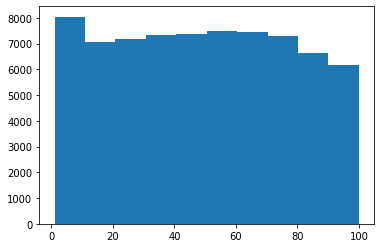

In [19]:
plt.hist(df2['r_COI_nat'])

'none'

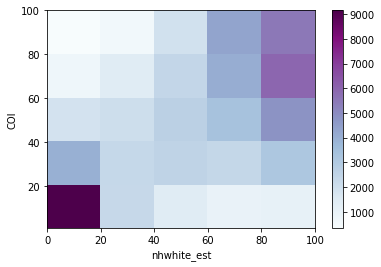

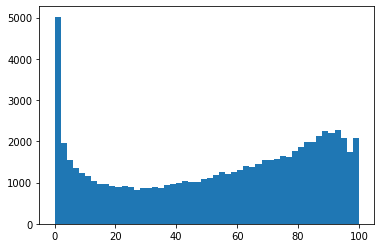

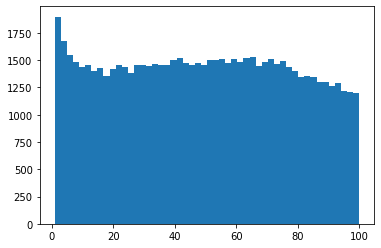

In [20]:
col = 'nhwhite_est'
plt.hist2d(df2[col],df2['r_COI_nat'], bins=(5,5), cmap=plt.cm.BuPu)
plt.ylabel('COI')
plt.xlabel(col)
plt.colorbar()

plt.figure()
plt.hist(df2[col],bins=50)
plt.figure()
plt.hist(df2['r_COI_nat'],bins=50)
'none'

# Group By
Next, we will look to see what the average COI is as a function of the percentage of non-hispanic whites in the neighborhood.
To do this we will need to group the data by the Child Opportunity Index (in [0,1,2,..., 100]) 
and then for each bin find the mean and median of the percentage of non-hispanic whites in the neighborhood.

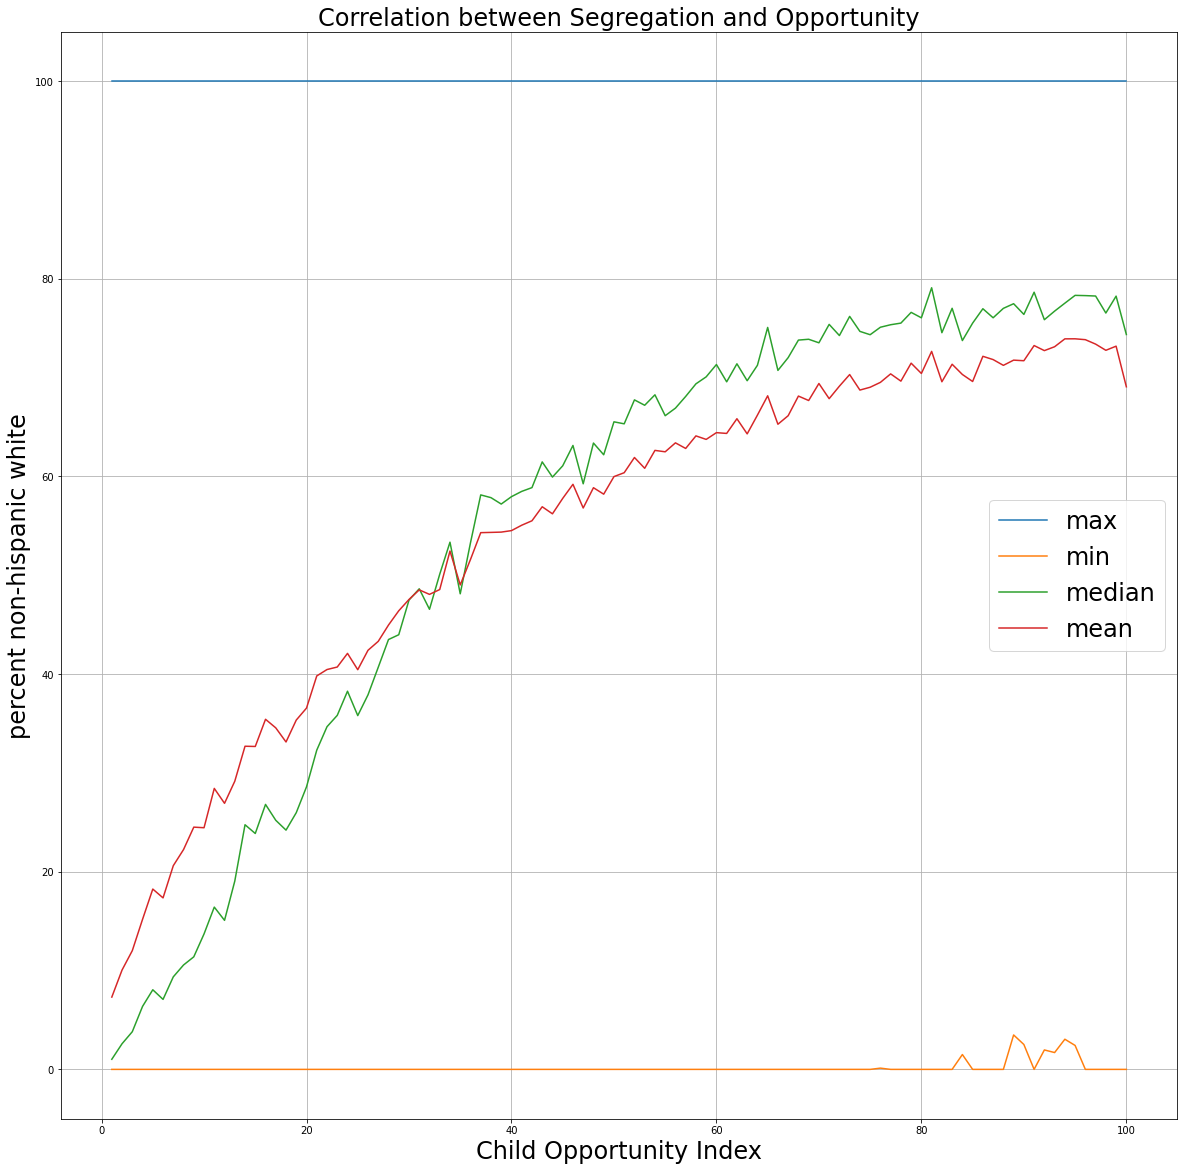

In [21]:
df2.groupby('r_COI_nat').nhwhite_est.agg(['max', 'min', 'median', 'mean']).plot(figsize=(20,20))
plt.ylabel("percent non-hispanic white",fontsize=24)
plt.xlabel("Child Opportunity Index",fontsize=24)
plt.legend(fontsize=24)
plt.title("Correlation between Segregation and Opportunity",fontsize=24)
plt.grid()


# Discussion
Child Opportunity and Segregation are tighly correlated. The higher the opportunity, the more white the neighborhood.

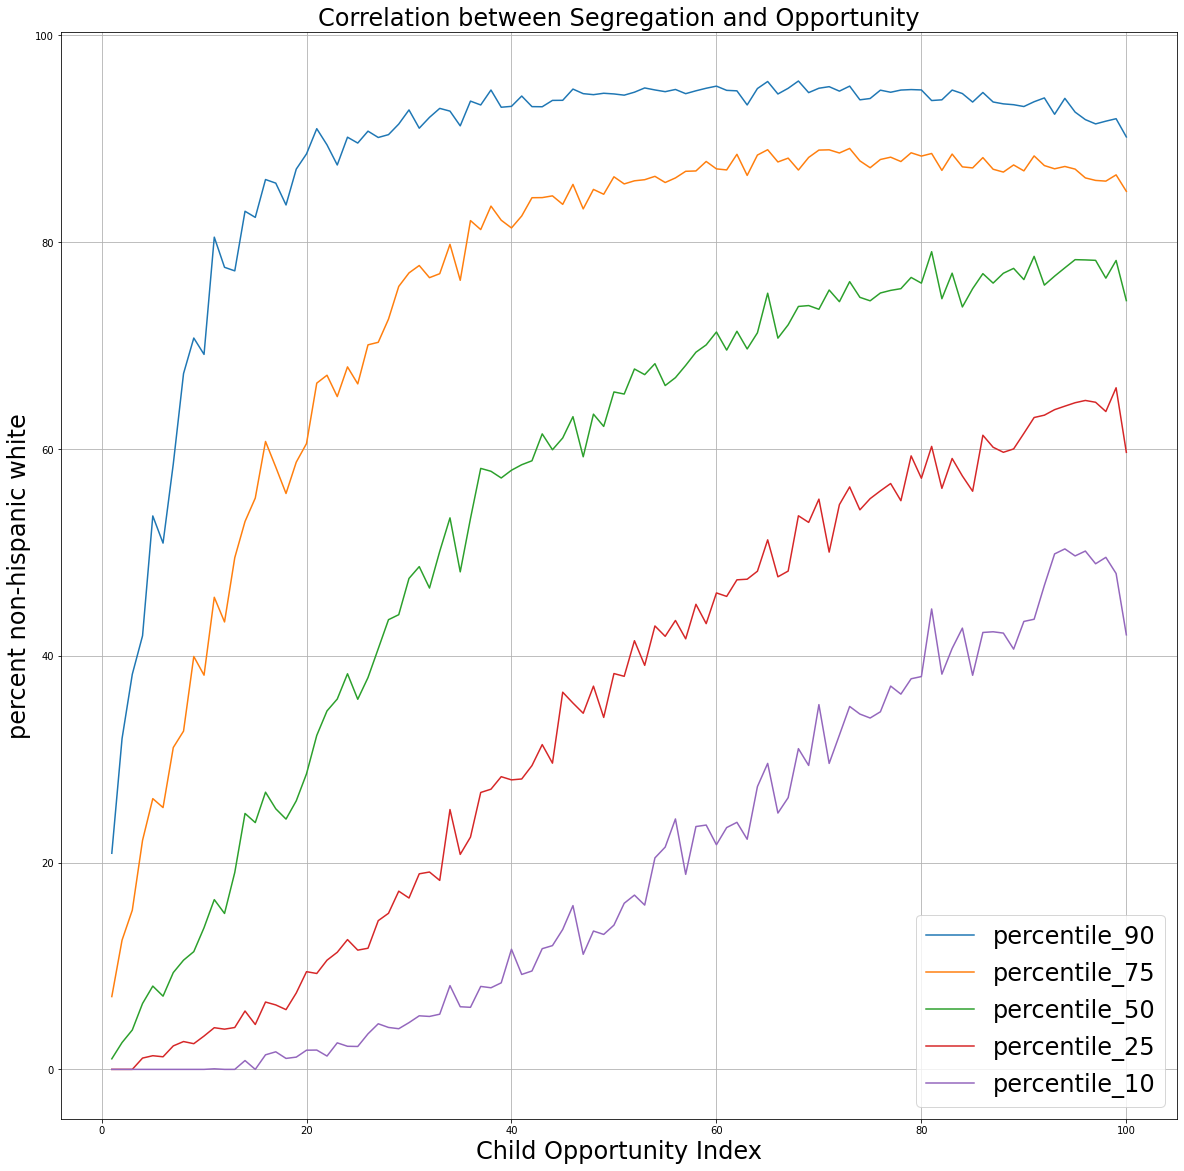

In [22]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_
df2.groupby('r_COI_nat').nhwhite_est.agg([percentile(n) for n in [90,75,50,25,10]]).plot(figsize=(20,20))
plt.ylabel("percent non-hispanic white",fontsize=24)
plt.xlabel("Child Opportunity Index",fontsize=24)
plt.legend(fontsize=24)
plt.title("Correlation between Segregation and Opportunity",fontsize=24)
plt.grid()


# Discussion
This shows that there is a linear relationship between the level of segration and the child opportunity, but there is quite a bit of variance. But about 75% of neigborhoods with child opportunity under 5/100 have fewer that 20% non-hispanic whites.

# Box plots for deciles of COI
How we look at creating box plots for deciles of the Child Opportunity Index
First we create a new column for the deciles by integer dividing r_COI_nat by 10
and assigning it to a new column.

In [52]:
df3 = df2.copy()
zz = df3.apply(lambda row: row['r_COI_nat']//10,axis=1)
zz

df3['COI_decile'] = zz
df3

,geoid,year_x,in100,msaid15,msaname15,countyfips,statefips,stateusps,pop,z_ED_nat,...,nnhwhite_se,other_est,other_se,othermore_est,othermore_se,twomore_est,twomore_se,white_est,white_se,COI_decile
0,1001020100,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,414,0.008932,...,19.601267,0.000000,1.615201,4.830918,3.389575,4.830918,3.389575,87.198067,4.675601,7
1,1001020200,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,508,-0.003518,...,17.907820,1.377953,1.936521,3.543307,2.309198,2.165354,1.858862,49.409451,9.393344,2
2,1001020300,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,804,-0.024829,...,17.703751,14.676617,7.543221,17.661692,7.653021,2.985075,2.069049,62.935322,6.124811,4
3,1001020400,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,968,-0.006424,...,17.726776,12.086777,6.622758,18.904959,6.962380,6.818182,2.868102,76.033058,4.999868,6
4,1001020500,2015,0.0,33860.0,"Montgomery, AL Metro Area",1001,1,AL,2528,0.010688,...,13.299748,0.000000,0.384749,5.102848,2.358436,5.102848,2.358436,71.400314,5.427132,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72183,56043000200,2015,NaN,NaN,NaN,56043,56,WY,667,0.002666,...,14.081539,11.694153,4.143226,20.839581,5.057827,9.145428,3.515352,75.112442,4.910016,6
72184,56043000301,2015,NaN,NaN,NaN,56043,56,WY,657,0.012065,...,15.115695,6.088280,3.571495,11.263318,5.250284,5.175038,4.111278,88.736687,2.972861,5
72185,56043000302,2015,NaN,NaN,NaN,56043,56,WY,706,0.023999,...,12.898554,9.915014,3.969937,9.915014,3.969937,0.000000,1.033262,90.084991,3.017513,6
72186,56045951100,2015,NaN,NaN,NaN,56045,56,WY,577,-0.009124,...,20.367887,0.000000,1.264269,3.986135,3.261933,3.986135,3.261933,93.760834,4.062153,4


# Aggregating with groupby then boxplotting


<AxesSubplot:>

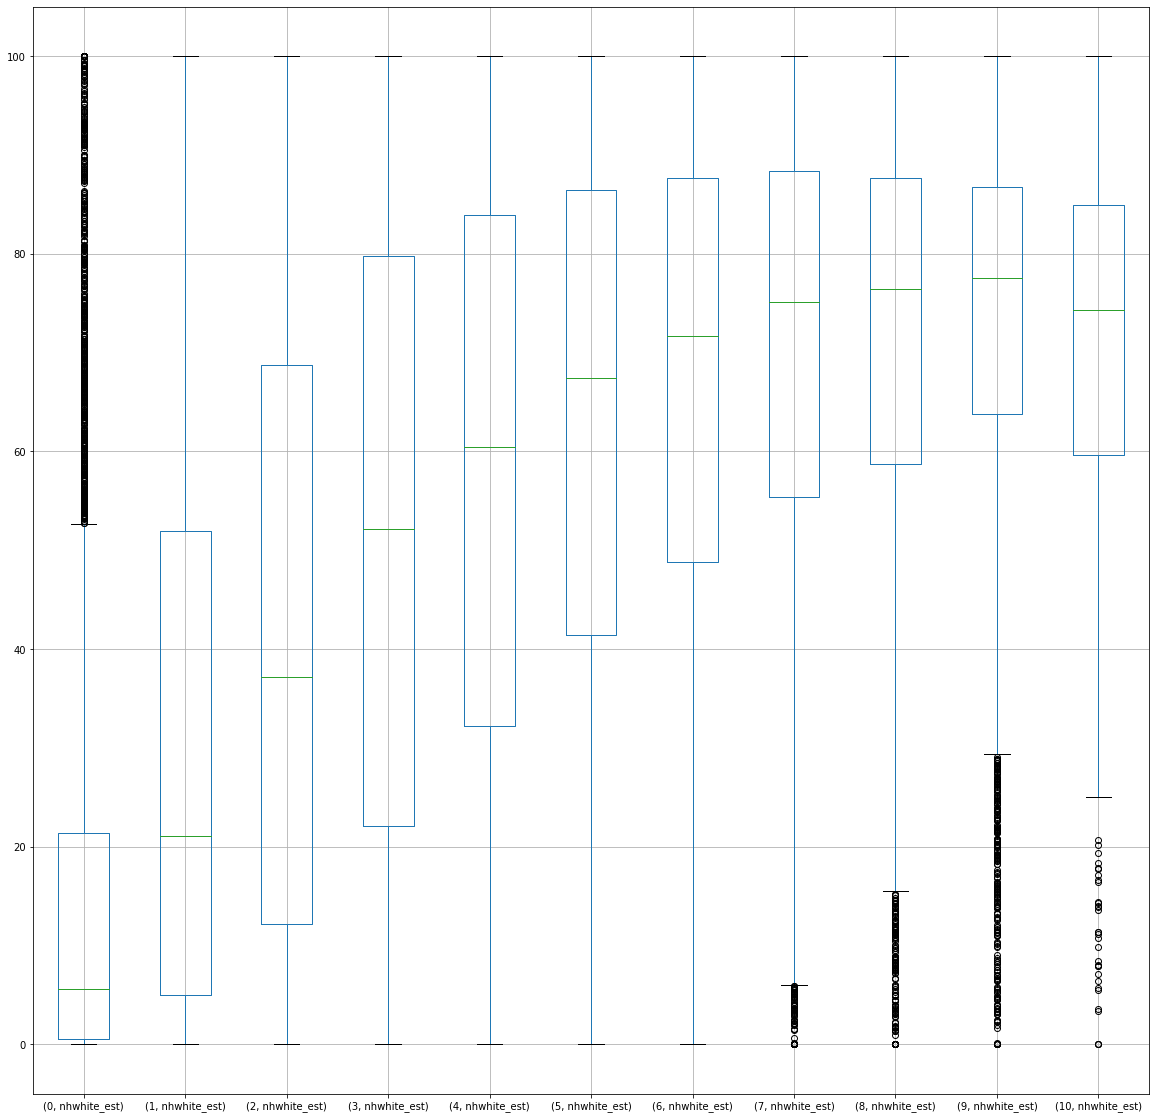

In [54]:
zz = df3.groupby('COI_decile')
zz.boxplot(subplots=False,column='nhwhite_est',figsize=(20,20),sharex=True)

In [26]:
help(zz.boxplot)

Help on method boxplot_frame_groupby in module pandas.plotting._core:

boxplot_frame_groupby(subplots=True, column=None, fontsize=None, rot=0, grid=True, ax=None, figsize=None, layout=None, sharex=False, sharey=True, backend=None, **kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Make box plots from DataFrameGroupBy data.
    
    Parameters
    ----------
    grouped : Grouped DataFrame
    subplots : bool
        * ``False`` - no subplots will be used
        * ``True`` - create a subplot for each group.
    
    column : column name or list of names, or vector
        Can be any valid input to groupby.
    fontsize : int or str
    rot : label rotation angle
    grid : Setting this to True will show the grid
    ax : Matplotlib axis object, default None
    figsize : A tuple (width, height) in inches
    layout : tuple (optional)
        The layout of the plot: (rows, columns).
    sharex : bool, default False
        Whether x-axes will be shared among s